In [1830]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1831]:
#Datei einlesen
data = pd.read_csv('master.csv')

In [1832]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [1833]:
#alle Spaltennamen
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [1834]:
#Datentyp der Spalten (+Null Werte)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [1835]:
#Zeilen- und Spaltenanzahl
data.shape

(31756, 12)

In [1836]:
#Anzahl der fehlenden oder Null Werte
print(data.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


<Axes: >

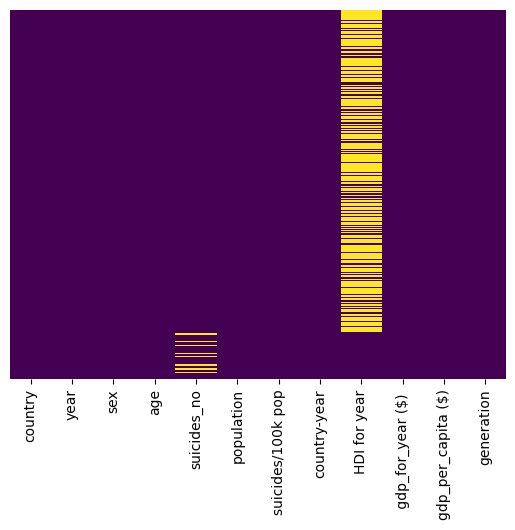

In [1837]:
#fehlende Werte als graphische Darstellung
sns.heatmap(data.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [1838]:
#Spalte von dem GDP der Hauptstadt entfernen 
dataclean = data.drop(columns = ['gdp_per_capita ($)'])

#Spalte vom HDI entfernen 
dataclean = dataclean.drop(columns = ['HDI for year'])

#Spalte mit Land-Jahr entfernen
dataclean = dataclean.drop(columns = ['country-year'])

In [1839]:
#Zeile vom järhlichen GDP umbennen
dataclean = dataclean.rename(columns= {' gdp_for_year ($) ': 'gdp_for_year ($)'})

In [1840]:
# alle Werte der USA werden bis 2015 als United States betitelt und danach als United States of America
# deswegen alle Werte der USA gleich betiteln mit 'United States of America'
dataclean['country'].replace('United States', 'United States of America', inplace=True)

In [1841]:
#Alle null-Werte dropen
dataclean = dataclean.dropna()

#Kommas in der Spalte GDP entfernen 
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].str.replace(',', '')

In [1842]:
#gdp Daten von objekt in float umgewandelt 
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].astype(float)

In [1843]:
display(dataclean)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,2.156625e+09,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,2.156625e+09,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,2.156625e+09,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,2.156625e+09,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,2.156625e+09,Boomers
...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,1.120000e+11,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,2.700000e+12,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,1.950000e+13,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,6.423397e+10,G.I. Generation


In [1844]:
#Name der Spalten
print(dataclean.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'generation'],
      dtype='object')


In [1845]:
#Zeilen- und Spaltenanzahl 
dataclean.shape 

(30556, 9)

In [1846]:
# Null-Werte des bereinigten Datensatz (Kontrolle)
print(dataclean.isnull().sum())

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year ($)     0
generation           0
dtype: int64


<Axes: >

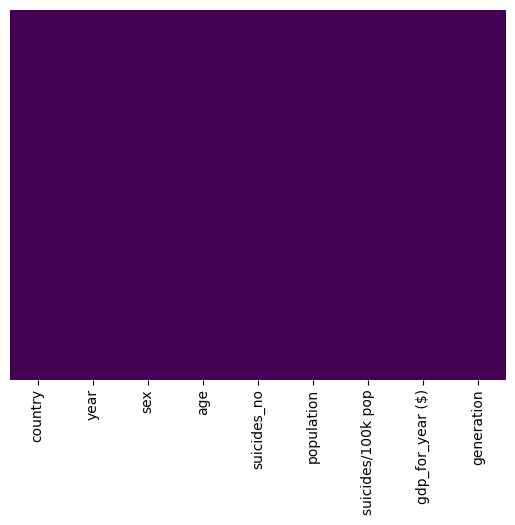

In [1847]:
#fehlende Nullwerte graphsich (Kontrolle)
sns.heatmap(dataclean.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [1848]:
#Minimum, Maximum, Standartabweichungen, Median und Quartale aller numerischen Werte
dataclean.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
count,30556.000000,30556.000000,3.055600e+04,30556.000000,3.055600e+04
mean,2002.766854,237.136242,4.990492e+06,12.176806,5.437237e+11
std,9.408922,867.956107,3.352492e+07,21.883165,2.353760e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07
25%,1995.000000,3.000000,1.198480e+05,0.553214,1.017287e+10
50%,2003.000000,25.000000,5.148010e+05,4.790000,5.385106e+10
75%,2010.000000,132.000000,2.401046e+06,15.150000,2.760000e+11
max,2020.000000,22338.000000,1.396215e+09,515.092734,5.100000e+13


In [1849]:
#alle nummerischen Spalten rausfiltern
allnumbers = dataclean.select_dtypes(include=['number'])

#Korrelationsmatrix ertsellen 
corr = allnumbers.corr()

#Farbgestaltung der Korrelationsmatrix
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
year,1.000000,-0.013955,0.152605,-0.075636,0.116055
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.290381
population,0.152605,0.099528,1.000000,-0.050510,0.281185
suicides/100k pop,-0.075636,0.270322,-0.050510,1.000000,0.299586
gdp_for_year ($),0.116055,0.290381,0.281185,0.299586,1.000000


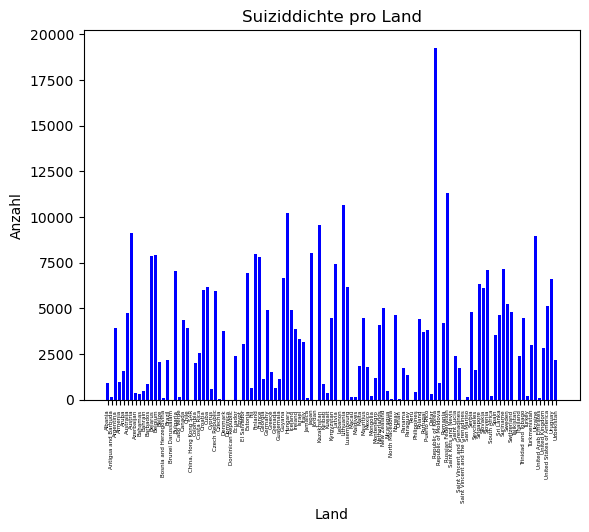

In [1850]:
#Aufsummieren aller Suizide pro 100k Einwhoner für jedes Land 
country2_no = dataclean.groupby('country')['suicides/100k pop'].sum().reset_index()

#Balkendiagramm erstelllen
plt.bar(country2_no['country'], country2_no['suicides/100k pop'], color = 'blue')

#Titel des Balkendiagramms
plt.title('Suiziddichte pro Land')

#X-Achse rotieren und Schriftgröße ändern
plt.xticks(rotation='vertical', fontsize = 4)

#X-Achsen Beschriftung 
plt.xlabel('Land')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe Balkendiagramms 
plt.show()

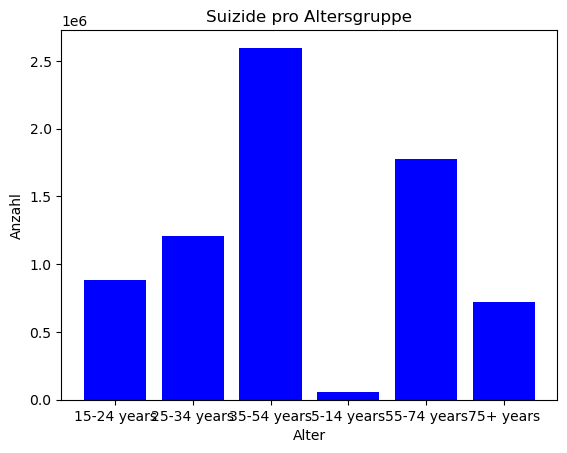

In [1851]:
#Aufssumieren aller Suizide für jede Altersklasse
age_no = dataclean.groupby('age')['suicides_no'].sum().reset_index()

#Balkendiagramm erstellen
plt.bar(age_no['age'], age_no['suicides_no'], color = 'blue')

# Titel des Balkendiagramms 
plt.title('Suizide pro Altersgruppe')

#X-Achse Beschriftung 
plt.xlabel('Alter')

#Y-Achse Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe Balkendiagramm
plt.show()

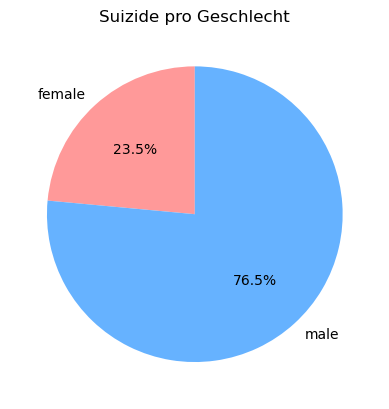

In [1852]:
#Aufsummieren aller Suizide für jedes Geschlecht 
sex_no = dataclean.groupby('sex')['suicides_no'].sum().reset_index()

#Farben des Kuchendiagramms 
colors = ['#FF9999', '#66B2FF']

#Kuchendiagramm erstellen
plt.pie(sex_no['suicides_no'], labels=['female', 'male'],autopct='%1.1f%%', startangle=90, colors = colors )

#Titel des Kuchendiagramms 
plt.title('Suizide pro Geschlecht')

#Ausgabe 
plt.show()

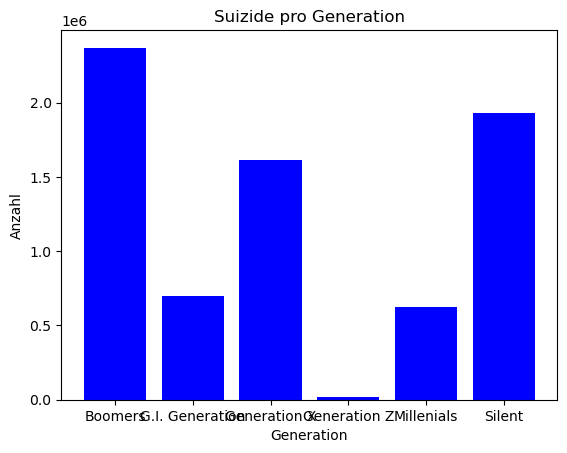

In [1853]:
#Aufsummieren aller Suizide für jede Generation
generation_no = dataclean.groupby('generation')['suicides_no'].sum().reset_index()

#Balkendiagramm erstellen
plt.bar(generation_no['generation'], generation_no['suicides_no'], color = 'blue')

#Titel des Balkendiagramms 
plt.title('Suizide pro Generation')

#Beschriftung X-Achse 
plt.xlabel('Generation')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Ausgabe Balkendaigramm
plt.show()

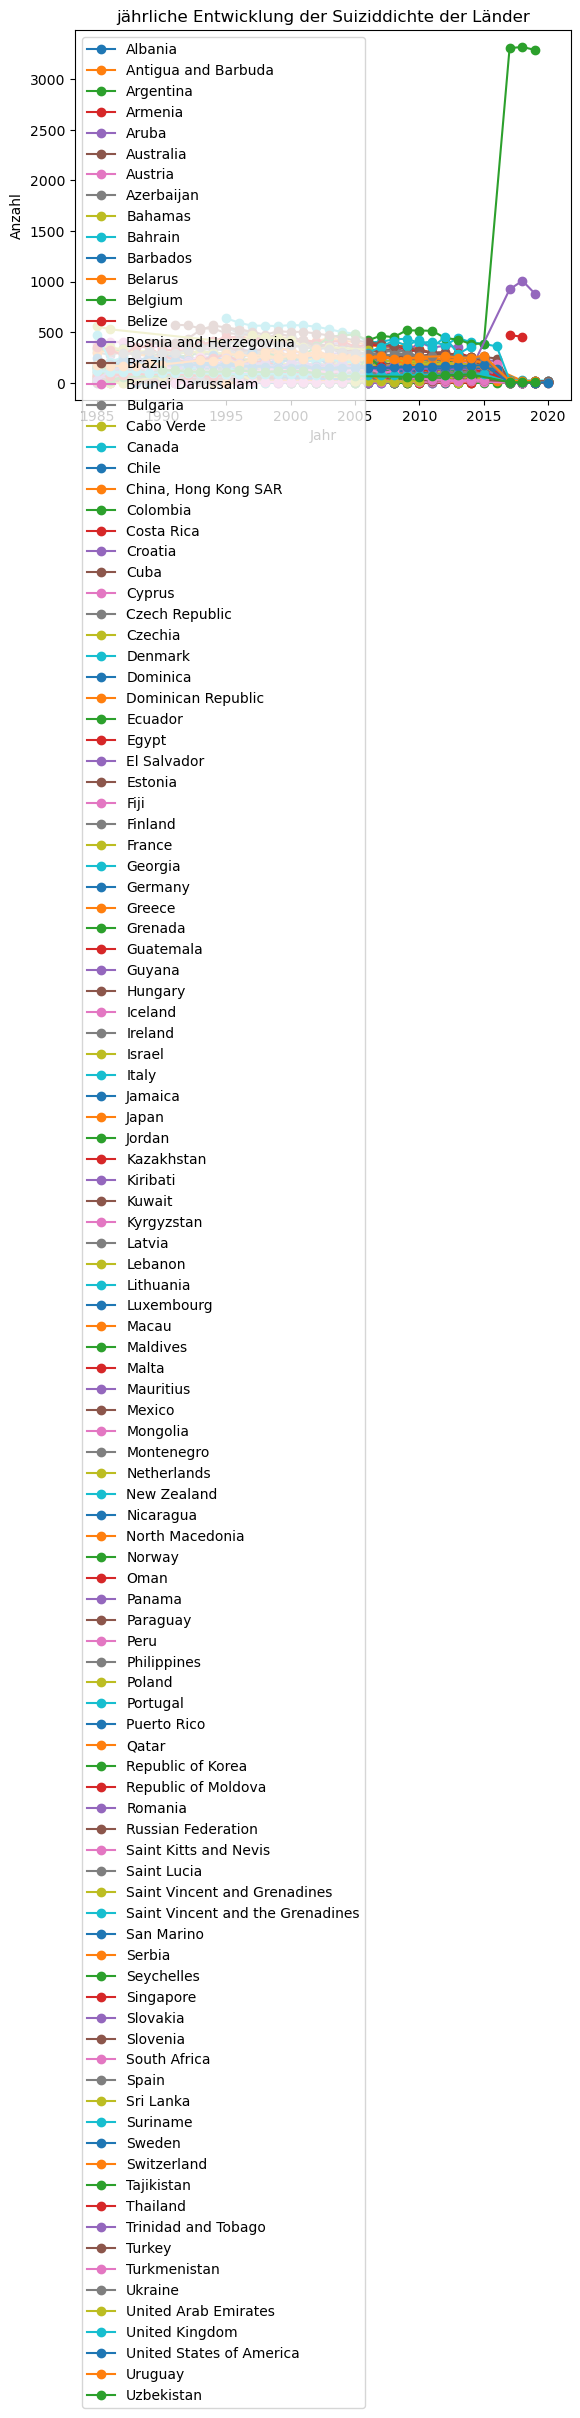

In [1854]:
#MUSS NOCH VERBESSERT WERDEN
#Aufsummieren aller Suizide pro 100k Einwhoner für jedes Land pro Land 
datahelp_country = dataclean.groupby(['year','country'])['suicides/100k pop'].sum().reset_index()

#Erstellen Liniendiagramm 
for country, suicides in datahelp_country.groupby('country'):
    plt.plot(suicides['year'], suicides['suicides/100k pop'], label=country, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung der Suiziddichte der Länder')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

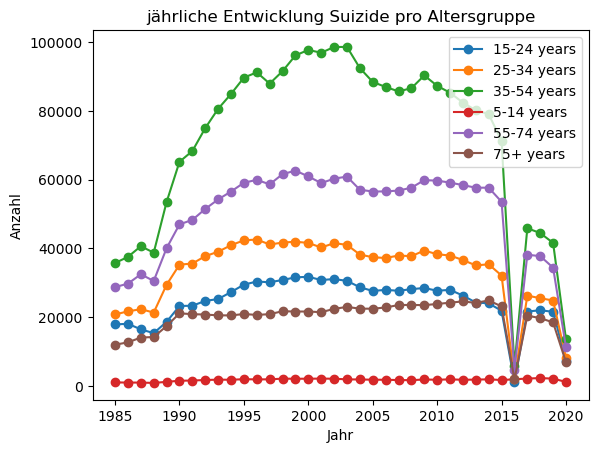

In [1855]:
#Aufsummierung aller Suizide pro Altersgruppe pro Jahr 
datahelp_age = dataclean.groupby(['year','age'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for age, suicides in datahelp_age.groupby('age'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=age, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro Altersgruppe')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

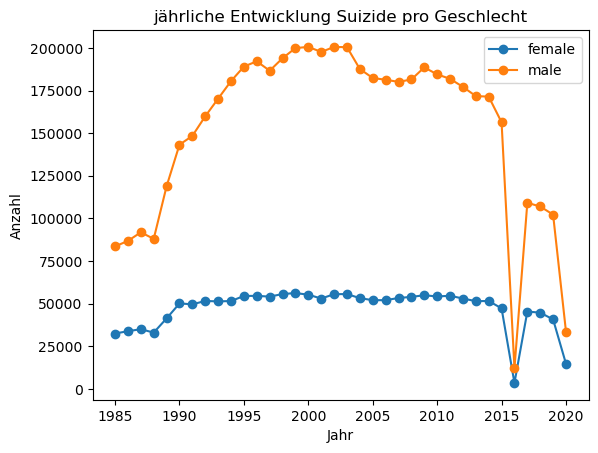

In [1856]:
#Aufsummieren aller Suizide pro Geschlecht pro Jahr 
datahelp_sex = dataclean.groupby(['year','sex'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for sex, suicides in datahelp_sex.groupby('sex'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=sex, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro Geschlecht')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

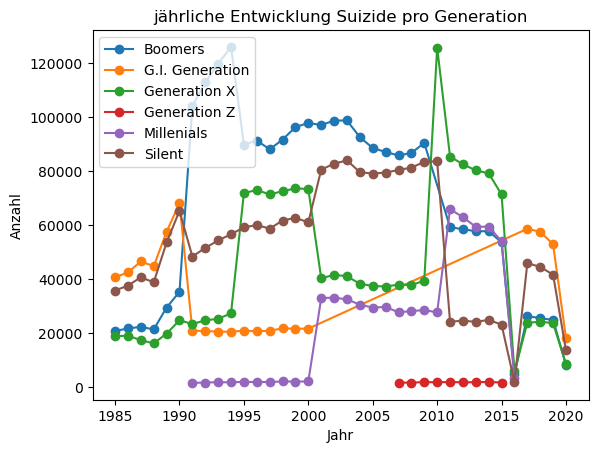

In [1857]:
#Aufsummieren aller Suizide pro Generation pro Jahr 
datahelp_generation = dataclean.groupby(['year','generation'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for generation, suicides in datahelp_generation.groupby('generation'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=generation, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro Generation')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

In [1858]:
#Einlesen Datei HDI
hdi = pd.read_csv('HDR21-22_Statistical_Annex_HDI_Trends_Table.csv')

#Spaltennamen von HDI an unseren Datensatz anpassen
hdi = hdi.rename(columns = {'Country': 'country'})

In [1859]:
#KOMMENTARE VERVOLLSTÄNDIGEN
#neuer Datensatz aus unserem Datensatz und HDI über einen inneren Join 
merged_data = pd.merge(dataclean, hdi, on='country', how='inner')

def get_value(row):
    year = row['year']
    column = f'hdi_{year}'
               
    if column in merged_data.columns:
        return row[column]
    else:
        return None
               
merged_data['hdi'] = merged_data.apply(get_value, axis=1)
               
merged_data = merged_data[['year', 'country', 'sex', 'age', 'suicides_no', 'hdi']].dropna()

In [1860]:
display(merged_data)

,year,country,sex,age,suicides_no,hdi
132,2000,Albania,male,25-34 years,17.0,0.677
133,2000,Albania,male,55-74 years,10.0,0.677
134,2000,Albania,female,75+ years,2.0,0.677
135,2000,Albania,male,75+ years,1.0,0.677
136,2000,Albania,female,15-24 years,6.0,0.677
...,...,...,...,...,...,...
28376,2018,Peru,female,15-24 years,62.0,0.776
28378,2018,Peru,female,25-34 years,33.0,0.776
28380,2018,Peru,female,35-54 years,24.0,0.776
28382,2018,Peru,female,55-74 years,10.0,0.776


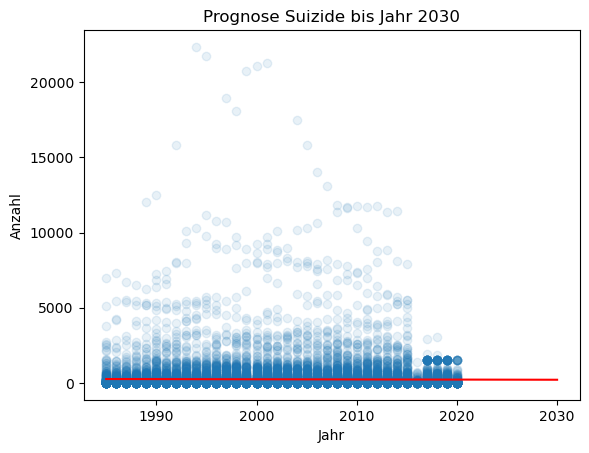

In [1861]:
#Lineare Regression 
regressor_jahr = LinearRegression()

#Input Variable 
x_jahr = dataclean['year']

#Output-Variable 
y_jahr = dataclean['suicides_no']

#Aufteilen in Test- und Trainingsdaten 
x_jahr_train,x_jahr_test,y_jahr_train,y_jahr_test=train_test_split(x_jahr,y_jahr,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_jahr.fit(np.array(x_jahr_train).reshape(-1, 1), np.array(y_jahr_train).reshape(-1, 1))

#Array für x bis 2030
x_j = np.linspace(min(x_jahr_train), 2030, 500)

#Arrray für y 
y_j = regressor_jahr.coef_ * x_j + regressor_jahr.intercept_

#Umformung in 2D-Array 
y_j = y_j.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_jahr_train, y = y_jahr_train, alpha = 0.1)
plt.plot(x, y, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizide bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

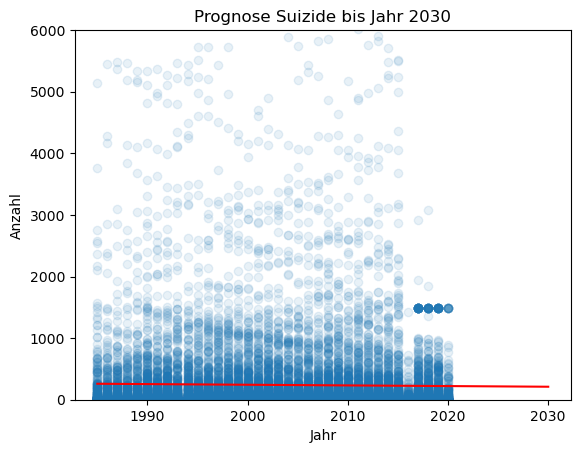

In [1862]:
#Diagramm erstellen
plt.scatter(x = x_jahr_train, y = y_jahr_train, alpha = 0.1)
plt.plot(x, y, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizide bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,6000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1863]:
#Steigung lineare Progression
print(regressor_jahr.coef_)

#Suizide insgesamt für 2030
suizide_2030 = np.array([[2030]])  
suizide_predict = regressor_jahr.predict(suizide_2030)
print(suizide_predict)

[[-1.07210198]]
[[210.92477501]]


In [1864]:
#Interpretation:
#pro Jahr durchschnittlich 1.07210198 Suizide weniger  
#im Jahr 2030 wird es wahrscheinlich 210.92477501 Suizidfälle geben 

In [1865]:
#Trainingsfehler der linearen Regression
y_jahr_train_pred = regressor_jahr.predict(np.array(x_jahr_train).reshape(-1,1))
r2_jahr =  r2_score(y_jahr_train, y_jahr_train_pred)
MSE_jahr =  mean_squared_error(y_jahr_train, y_jahr_train_pred)
print(r2_jahr)
print(MSE_jahr)

0.00013098026539126728
776974.4796867933


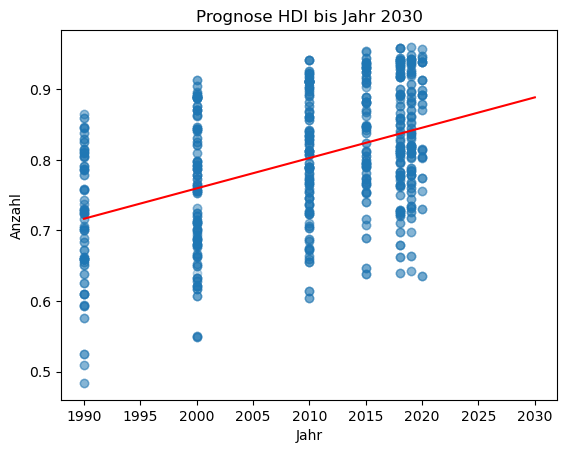

In [1866]:
#Lineare Regression 
regressor_hdi = LinearRegression()

#Input Variable 
x_hdi = merged_data['year']

#Output-Variable 
y_hdi = merged_data['hdi']

#Aufteilen in Test- und Trainingsdaten 
x_hdi_train,x_hdi_test,y_hdi_train,y_hdi_test=train_test_split(x_hdi,y_hdi,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_hdi.fit(np.array(x_hdi_train).reshape(-1, 1), np.array(y_hdi_train).reshape(-1, 1))

#Array für x bis 2030
x_h = np.linspace(min(x_hdi_train), 2030, 500)

#Arrray für y 
y_h = regressor_hdi.coef_ * x_h + regressor_hdi.intercept_

#Umformung in 2D-Array 
y_h = y_h.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_hdi_train, y = y_hdi_train, alpha = 0.1)
plt.plot(x_h, y_h, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose HDI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1867]:
#Steigung lineare Progression
print(regressor_hdi.coef_)

#HDI für 2030
hdi_2030 = np.array([[2030]])  
hdi_predict = regressor_hdi.predict(hdi_2030)
print(hdi_predict)

[[0.00429872]]
[[0.88855046]]


In [1868]:
#Interpretation: 
#pro Jahr steigt der HDI durchschnittlich um 0.00429872 weltweit 
# In 2030 wird der HDI durchschnittlich wahrscheinlich 0.88855046 betragen 

In [1869]:
#Trainingsfehler der linearen Regression
y_hdi_train_pred = regressor_hdi.predict(np.array(x_hdi_train).reshape(-1,1))
r2_hdi =  r2_score(y_hdi_train, y_hdi_train_pred)
MSE_hdi =  mean_squared_error(y_hdi_train, y_hdi_train_pred)
print(r2_hdi)
print(MSE_hdi)

0.19612761754348296
0.007456574097769366


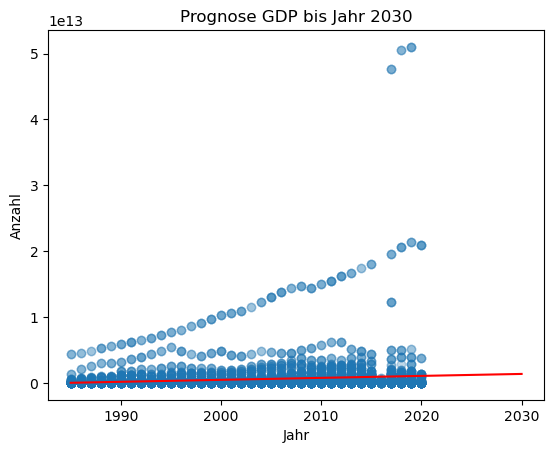

In [1870]:
#Lineare Regression 
regressor_gdp = LinearRegression()

#Input Variable 
x_gdp = dataclean['year']

#Output-Variable 
y_gdp = dataclean['gdp_for_year ($)']

#Aufteilen in Test- und Trainingsdaten 
x_gdp_train,x_gdp_test,y_gdp_train,y_gdp_test=train_test_split(x_gdp,y_gdp,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_gdp.fit(np.array(x_gdp_train).reshape(-1, 1), np.array(y_gdp_train).reshape(-1, 1))

#Array für x bis 2030
x_g = np.linspace(min(x_gdp_train), 2030, 500)

#Arrray für y 
y_g = regressor_gdp.coef_ * x_g + regressor_gdp.intercept_

#Umformung in 2D-Array 
y_g = y_g.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_gdp_train, y = y_gdp_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose GDP bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

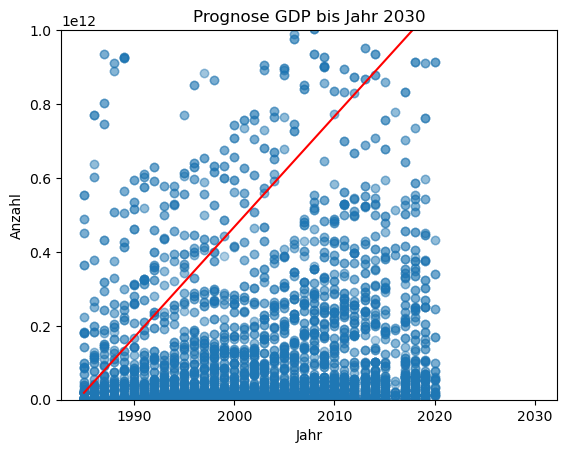

In [1871]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_gdp_train, y = y_gdp_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose GDP bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,0.1e13)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1872]:
#Steigung lineare Progression
print(regressor_gdp.coef_)

#GDP für 2030
gdp_2030 = np.array([[2030]])  
gdp_predict = regressor_gdp.predict(gdp_2030)
print(gdp_predict)

[[2.99212575e+10]]
[[1.36522845e+12]]


In [1873]:
#Interpretation:
#pro Jahr steigt der GDP durchschnittlich um 2.99212575e+10
#in 2030 wird der GDP durchschnittlich 1.36522845e+12 betragen 

In [1874]:
#Trainingsfehler der linearen Regression
y_gdp_train_pred = regressor_gdp.predict(np.array(x_gdp_train).reshape(-1,1))
r2_gdp =  r2_score(y_gdp_train, y_gdp_train_pred)
MSE_gdp =  mean_squared_error(y_gdp_train, y_gdp_train_pred)
print(r2_gdp)
print(MSE_gdp)

0.014343896093661823
5.447726267218812e+24


In [1875]:
#Gruppierungen in 0.1 Schritten von 0.4 bis 1.0
def custom_rename(value):
    if 0.4 <= value < 0.5:
        return 'Group_0.4'
    elif 0.5 <= value < 0.6:
        return 'Group_0.5'
    elif 0.6 <= value < 0.7:
        return 'Group_0.6'
    elif 0.7 <= value < 0.8:
        return 'Group_0.7'
    elif 0.8 <= value < 0.9:
        return 'Group_0.8'
    elif 0.9 <= value < 1.0:
        return 'Group_0.9'
    else:
        return 'Other_Value'

#HDI Gruppieren
merged_data['HDI_neu'] = merged_data['hdi'].apply(custom_rename)

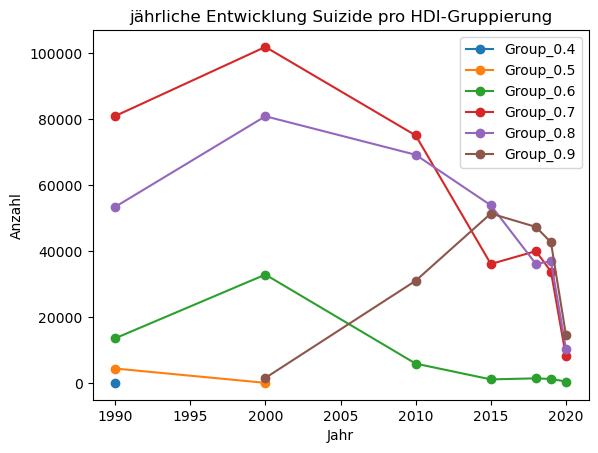

In [1876]:
#Aufsummierung aller Suizide für alle HDI-Gruppen
datahelp_hdi = merged_data.groupby(['year','HDI_neu'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for hdi, suicides in datahelp_hdi.groupby('HDI_neu'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=hdi, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro HDI-Gruppierung')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

In [1877]:
#Gruppierungen
def custom_rename(value):
    if 4.691962e+07 <= value < 5e+07:
        return 'Group_4e+07'
    elif 0.5e+07 <= value < 0.5e+08:
        return 'Group_5e+07'
    elif 0.5e+08 <= value < 0.5e+09:
        return 'Group_5e+08'
    elif 0.5e+09 <= value < 0.5e+10:
        return 'Group_5e+09'
    elif 0.5e+10 <= value < 0.5e+11:
        return 'Group_5e+10'
    elif 0.5e+11 <= value < 0.5e+12:
        return 'Group_5e+11'
    elif 0.5e+12 <= value < 5.100000e+13:
        return 'Group_5e+12'
    else:
        return 'Other_Value'

#Gruppierungen des GDP
dataclean['GDP_neu'] = dataclean['gdp_for_year ($)'].apply(custom_rename)

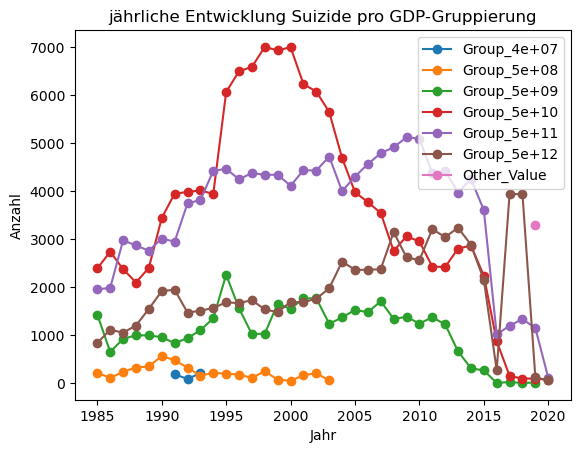

In [1878]:
#Aufsummierung aller Suizide pro GDP-Gruppierung
datahelp_gdp2 = dataclean.groupby(['year','GDP_neu'])['suicides/100k pop'].sum().reset_index()

#Erstellung Liniendiagramm
for hdi, suicides in datahelp_gdp2.groupby('GDP_neu'):
    plt.plot(suicides['year'], suicides['suicides/100k pop'], label=hdi, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro GDP-Gruppierung')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

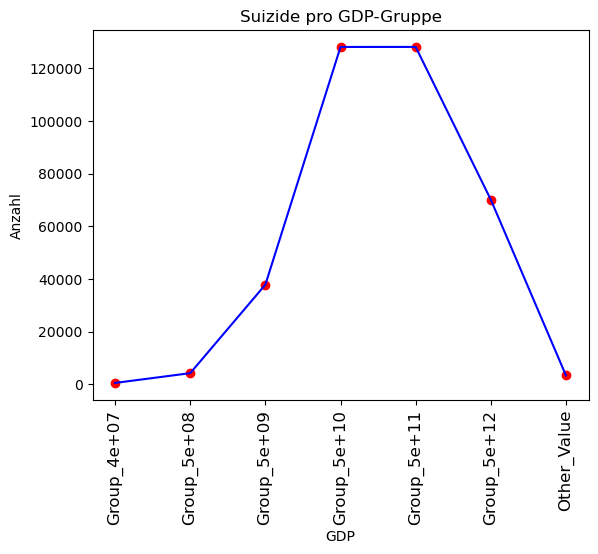

In [1879]:
#Aufsummierung aller Suizide pro GDP-Gruppe
gdp_no = dataclean.groupby('GDP_neu')['suicides/100k pop'].sum().reset_index()

#Liniendiagramm erstellen
plt.plot(gdp_no['GDP_neu'], gdp_no['suicides/100k pop'], color = 'blue')
plt.scatter(gdp_no['GDP_neu'], gdp_no['suicides/100k pop'],color = 'red')

#Titel des Liniendiagramm 
plt.title('Suizide pro GDP-Gruppe')

#X-Achse rotieren und Schriftgröße ändern
plt.xticks(rotation='vertical', fontsize = 12)

#Beschriftung X-Achse 
plt.xlabel('GDP')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Ausgabe Balkendaigramm
plt.show()

In [1880]:
#Alle Suizide der Frauen
word = 'female'
suicide_female = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_female = dataclean[dataclean['sex'] == word]['year'].tolist()

#Neue Tabelle 
female = pd.DataFrame({'suicide': suicide_female, 'year': year_female})

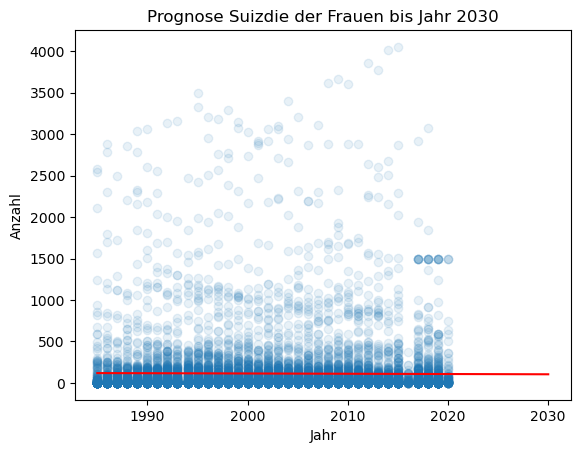

In [1881]:
#Lineare Regression 
regressor_female = LinearRegression()

#Input Variable 
x_female = female['year']

#Output-Variable 
y_female = female['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_female_train,x_female_test,y_female_train,y_female_test=train_test_split(x_female,y_female,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_female.fit(np.array(x_female_train).reshape(-1, 1), np.array(y_female_train).reshape(-1, 1))

#Array für x bis 2030
x_f = np.linspace(min(x_female_train), 2030, 500)

#Arrray für y 
y_f = regressor_female.coef_ * x_f + regressor_female.intercept_

#Umformung in 2D-Array 
y_f = y_f.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_female_train, y = y_female_train, alpha = 0.1)
plt.plot(x_f, y_f, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Frauen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

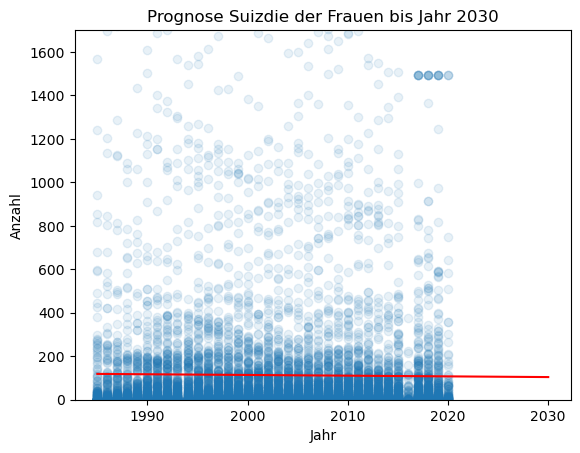

In [1882]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_female_train, y = y_female_train, alpha = 0.1)
plt.plot(x_f, y_f, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Frauen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1883]:
#Steigung lineare Progression
print(regressor_female.coef_)

#Suizide der Frauen für 2030
female_2030 = np.array([[2030]])  
female_predict = regressor_female.predict(female_2030)
print(female_predict)

[[-0.32429377]]
[[104.15467027]]


In [1884]:
#Trainingsfehler der linearen Regression
y_female_train_pred = regressor_female.predict(np.array(x_female_train).reshape(-1,1))
r2_female =  r2_score(y_female_train, y_female_train_pred)
MSE_female =  mean_squared_error(y_female_train, y_female_train_pred)
print(r2_female)
print(MSE_female)

8.459509240388297e-05
110369.62543117287


In [1885]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide der Frauen um 0.32429377
#im Jahr 2030 wird es wahrscheinlich 104.15467027 weibliche Suizide geben 

In [1886]:
#Alle Suizide der Männer
word = 'male'
suicide_male = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_male = dataclean[dataclean['sex'] == word]['year'].tolist()
#neue Tabelle
male = pd.DataFrame({'suicide': suicide_male, 'year': year_male})

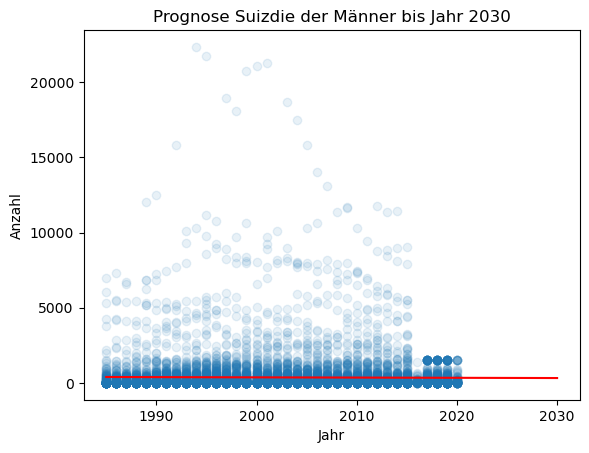

In [1887]:
#Lineare Regression 
regressor_male = LinearRegression()

#Input Variable 
x_male = male['year']

#Output-Variable 
y_male = male['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_male_train,x_male_test,y_male_train,y_male_test=train_test_split(x_male,y_male,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_male.fit(np.array(x_male_train).reshape(-1, 1), np.array(y_male_train).reshape(-1, 1))

#Array für x bis 2030
x_m = np.linspace(min(x_male_train), 2030, 500)

#Arrray für y 
y_m = regressor_male.coef_ * x_m + regressor_male.intercept_

#Umformung in 2D-Array 
y_m = y_m.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_male_train, y = y_male_train, alpha = 0.1)
plt.plot(x_m, y_m, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Männer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

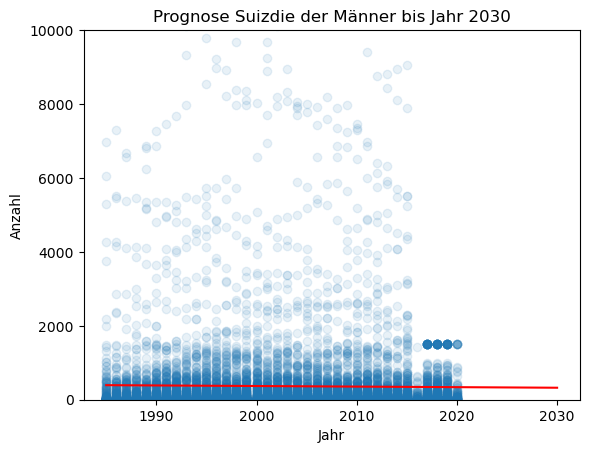

In [1888]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_male_train, y = y_male_train, alpha = 0.1)
plt.plot(x_m, y_m, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Männer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,10000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1889]:
#Steigung lineare Progression
print(regressor.coef_)

#Suizide der Männer für 2030
male_2030 = np.array([[2030]])  
male_predict = regressor_male.predict(male_2030)
print(male_predict)

[[-1.07210198]]
[[324.44506952]]


In [1890]:
#Interpretation
#pro jahr sinken die männlichen Suizide um 1.54373504
#in 2030 wird es wahrscheinlich 324.44506952 männliche Suizide geben

In [1891]:
#Trainingsfehler der linearen Regression
y_male_train_pred = regressor_male.predict(np.array(x_male_train).reshape(-1,1))
r2_male =  r2_score(y_male_train, y_male_train_pred)
MSE_male =  mean_squared_error(y_male_train, y_male_train_pred)
print(r2_male)
print(MSE_male)

0.00014988144806737935
1411519.308776004


In [1892]:
#Alle Suizide der 5-14 Jährigen
word = '5-14 years'
suicide_5 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_5 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
five = pd.DataFrame({'suicide': suicide_5, 'year': year_5})

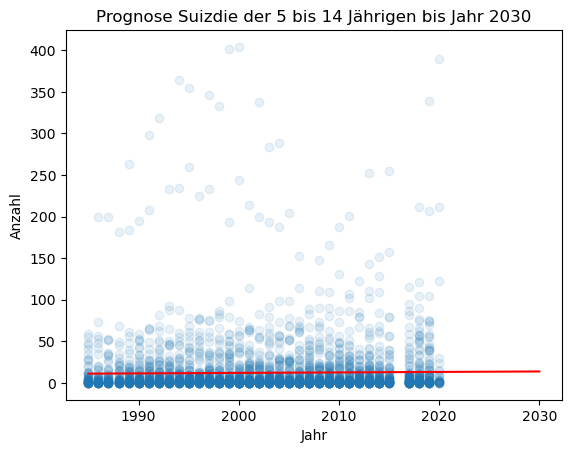

In [1893]:
#Lineare Regression 
regressor_five = LinearRegression()

#Input Variable 
x_five = five['year']

#Output-Variable 
y_five = five['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_five_train,x_five_test,y_five_train,y_five_test=train_test_split(x_five,y_five,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_five.fit(np.array(x_five_train).reshape(-1, 1), np.array(y_five_train).reshape(-1, 1))

#Array für x bis 2030
x_fi = np.linspace(min(x_five_train), 2030, 500)

#Arrray für y 
y_fi = regressor_five.coef_ * x_fi + regressor_five.intercept_

#Umformung in 2D-Array 
y_fi = y_fi.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_five_train, y = y_five_train, alpha = 0.1)
plt.plot(x_fi, y_fi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 5 bis 14 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()


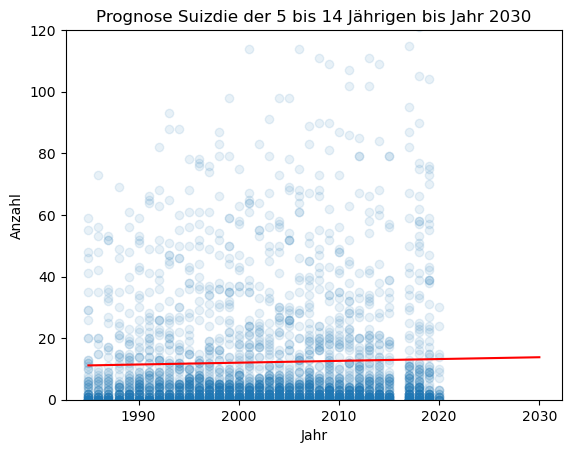

In [1894]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_five_train, y = y_five_train, alpha = 0.1)
plt.plot(x_fi, y_fi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 5 bis 14 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,120)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1895]:
#Steigung lineare Progression
print(regressor_five.coef_)

#Suizide der 5 -14 Jährigen für 2030
five_2030 = np.array([[2030]])  
five_predict = regressor_five.predict(five_2030)
print(five_predict)

[[0.05895661]]
[[13.79499429]]


In [1896]:
#Interpretation:
#die Suizide der 5-14 jährigen steigen pro Jahr um 0.05895661
#2030 wird es wahrscheilich 13.79499429 Suizide der 5-14 Jähriigen geben 

In [1897]:
#Trainingsfehler der linearen Regression
y_five_train_pred = regressor_five.predict(np.array(x_five_train).reshape(-1,1))
r2_five =  r2_score(y_five_train, y_five_train_pred)
MSE_five =  mean_squared_error(y_five_train, y_five_train_pred)
print(r2_five)
print(MSE_five)

0.0002903703268126723
1054.800343414629


In [1898]:
#Alle Suizide der 15-24 Jährigen
word = '15-24 years'
suicide_15 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_15 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
fiveteen = pd.DataFrame({'suicide': suicide_15, 'year': year_15})

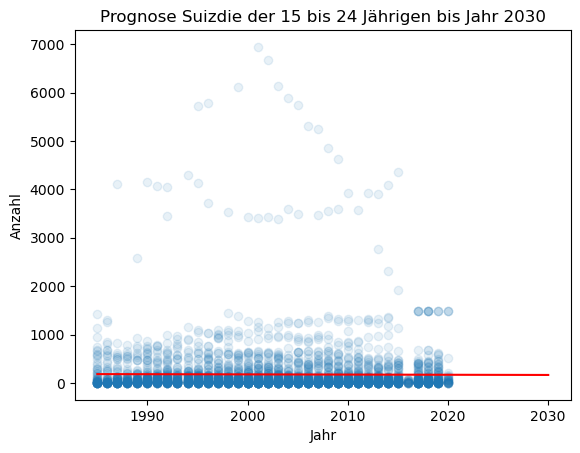

In [1899]:
#Lineare Regression 
regressor_fiveteen = LinearRegression()

#Input Variable 
x_fiveteen = fiveteen['year']

#Output-Variable 
y_fiveteen = fiveteen['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_fiveteen_train,x_fiveteen_test,y_fiveteen_train,y_fiveteen_test=train_test_split(x_fiveteen,y_fiveteen,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_fiveteen.fit(np.array(x_fiveteen_train).reshape(-1, 1), np.array(y_fiveteen_train).reshape(-1, 1))

#Array für x bis 2030
x_fiv = np.linspace(min(x_fiveteen_train), 2030, 500)

#Arrray für y 
y_fiv = regressor_fiveteen.coef_ * x_fiv + regressor_fiveteen.intercept_

#Umformung in 2D-Array 
y_fiv = y_fiv.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_fiveteen_train, y = y_fiveteen_train, alpha = 0.1)
plt.plot(x_fiv, y_fiv, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 15 bis 24 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

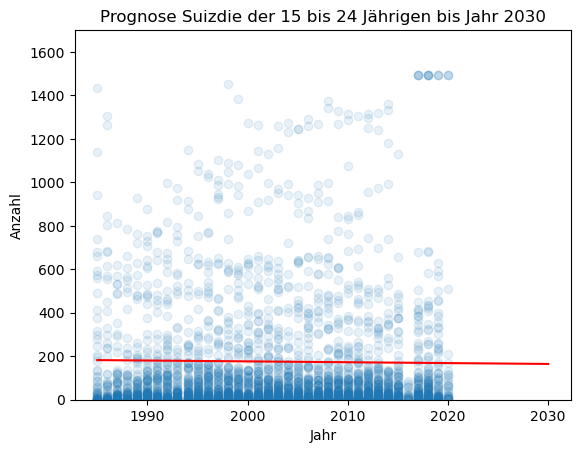

In [1900]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_fiveteen_train, y = y_fiveteen_train, alpha = 0.1)
plt.plot(x_fiv, y_fiv, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 15 bis 24 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1901]:
#Steigung lineare Progression
print(regressor_fiveteen.coef_)

#Suizide der 15 -24 Jährigen für 2030
fiveteen_2030 = np.array([[2030]])  
fiveteen_predict = regressor_fiveteen.predict(fiveteen_2030)
print(fiveteen_predict)

[[-0.39327871]]
[[164.57360271]]


In [1902]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 15-24 Jährigen um 0.39327871
#in 2030 wird es wahrscheinlich 164.57360271 Suizide der 15-24 Jährigen geben

In [1903]:
#Trainingsfehler der linearen Regression
y_fiveteen_train_pred = regressor_fiveteen.predict(np.array(x_fiveteen_train).reshape(-1,1))
r2_fiveteen =  r2_score(y_fiveteen_train, y_fiveteen_train_pred)
MSE_fiveteen =  mean_squared_error(y_fiveteen_train, y_fiveteen_train_pred)
print(r2_fiveteen)
print(MSE_fiveteen)

5.2637935440635886e-05
258015.81979816448


In [1904]:
#Alle Suizide der 25-34 Jährigen
word = '25-34 years'
suicide_25 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_25 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
twentyfive = pd.DataFrame({'suicide': suicide_25, 'year': year_25})

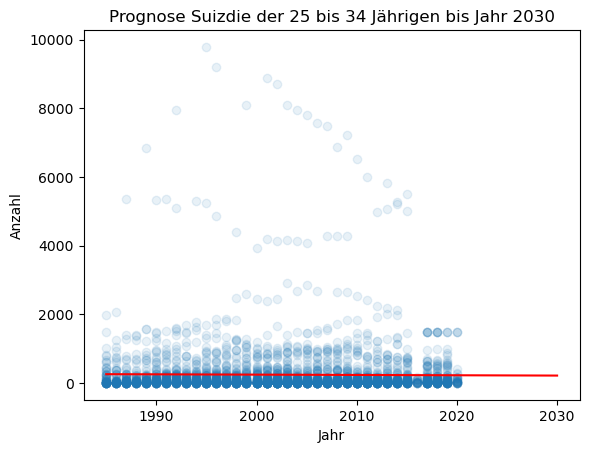

In [1905]:
#Lineare Regression 
regressor_twentyfive = LinearRegression()

#Input Variable 
x_twentyfive = twentyfive['year']

#Output-Variable 
y_twentyfive = twentyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_twentyfive_train,x_twentyfive_test,y_twentyfive_train,y_twentyfive_test=train_test_split(x_twentyfive,y_twentyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_twentyfive.fit(np.array(x_twentyfive_train).reshape(-1, 1), np.array(y_twentyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_t = np.linspace(min(x_twentyfive_train), 2030, 500)

#Arrray für y 
y_t = regressor_twentyfive.coef_ * x_t + regressor_twentyfive.intercept_

#Umformung in 2D-Array 
y_t = y_t.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_twentyfive_train, y = y_twentyfive_train, alpha = 0.1)
plt.plot(x_t, y_t, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 25 bis 34 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

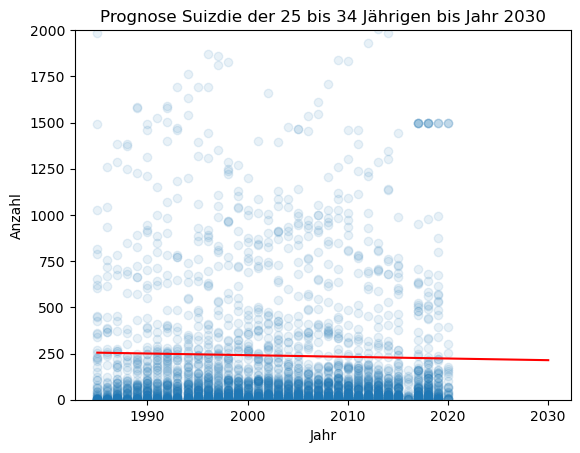

In [1906]:
#Diagramm erstellen
plt.scatter(x = x_twentyfive_train, y = y_twentyfive_train, alpha = 0.1)
plt.plot(x_t, y_t, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 25 bis 34 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,2000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1907]:
#Steigung lineare Progression
print(regressor_twentyfive.coef_)

#Suizide der 25-34 Jährigen für 2030
twentyfive_2030 = np.array([[2030]])  
twentyfive_predict = regressor_twentyfive.predict(twentyfive_2030)
print(twentyfive_predict)

[[-0.90389132]]
[[213.99673491]]


In [1908]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 25-34 Jährigen um 0.90389132
#in 2030 wird es wahrscheinlich 213.99673491 Suizide der 25-34 Jährigen geben

In [1909]:
#Trainingsfehler der linearen Regression
y_twentyfive_train_pred = regressor_twentyfive.predict(np.array(x_twentyfive_train).reshape(-1,1))
r2_twentyfive =  r2_score(y_twentyfive_train, y_twentyfive_train_pred)
MSE_twentyfive =  mean_squared_error(y_twentyfive_train, y_twentyfive_train_pred)
print(r2_twentyfive)
print(MSE_twentyfive)

0.00013651948953152804
525467.2486240503


In [1910]:
#Alle Suizide der 35 bis 54-Järigen
word = '35-54 years'
suicide_35 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_35 = dataclean[dataclean['age'] == word]['year'].tolist()
thirtyfive = pd.DataFrame({'suicide': suicide_35, 'year': year_35})

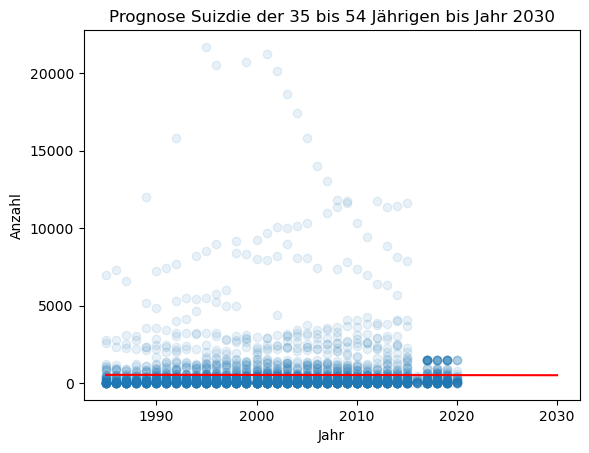

In [1911]:
#Lineare Regression 
regressor_thirtyfive = LinearRegression()

#Input Variable 
x_thirtyfive = thirtyfive['year']

#Output-Variable 
y_thirtyfive = thirtyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_thirtyfive_train,x_thirtyfive_test,y_thirtyfive_train,y_thirtytfive_test=train_test_split(x_thirtyfive,y_thirtyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_thirtyfive.fit(np.array(x_thirtyfive_train).reshape(-1, 1), np.array(y_thirtyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_th = np.linspace(min(x_thirtyfive_train), 2030, 500)

#Arrray für y 
y_th = regressor_thirtyfive.coef_ * x_th + regressor_thirtyfive.intercept_

#Umformung in 2D-Array 
y_th = y_th.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_thirtyfive_train, y = y_thirtyfive_train, alpha = 0.1)
plt.plot(x_th, y_th, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 35 bis 54 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show() 

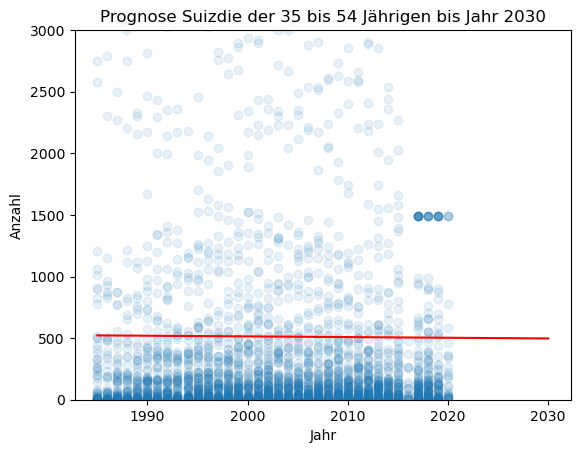

In [1912]:
#Bessere (aber unvolllständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_thirtyfive_train, y = y_thirtyfive_train, alpha = 0.1)
plt.plot(x_th, y_th, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 35 bis 54 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,3000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show() 

In [1913]:
#Steigung lineare Progression
print(regressor_thirtyfive.coef_)

#Suizide der 34-55 Jährigen für 2030
thirtyfive_2030 = np.array([[2030]])  
thirtyfive_predict = regressor_thirtyfive.predict(thirtyfive_2030)
print(thirtyfive_predict)

[[-0.55157428]]
[[497.42024543]]


In [1914]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 35-54 Jährigen um 0.55157428
#in 2030 wird es wahrscheinlich 497.42024543 Suizide der 35-54 Jährigen geben

In [1915]:
#Trainingsfehler der linearen Regression
y_thirtyfive_train_pred = regressor_thirtyfive.predict(np.array(x_thirtyfive_train).reshape(-1,1))
r2_thirtyfive =  r2_score(y_thirtyfive_train, y_thirtyfive_train_pred)
MSE_thirtyfive =  mean_squared_error(y_thirtyfive_train, y_thirtyfive_train_pred)
print(r2_thirtyfive)
print(MSE_thirtyfive)

1.0918283341321278e-05
2446899.2308146814


In [1916]:
#Alle Suizide der 55 bis 75 Jährigen
word = '55-74 years'

suicide_55 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_55 = dataclean[dataclean['age'] == word]['year'].tolist()
fiftyfive = pd.DataFrame({'suicide': suicide_55, 'year': year_55})

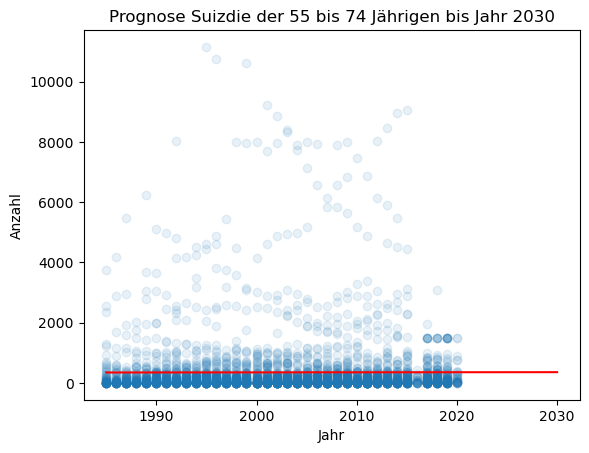

In [1917]:
#Lineare Regression 
regressor_fiftyfive = LinearRegression()

#Input Variable 
x_fiftyfive = fiftyfive['year']

#Output-Variable 
y_fiftyfive = fiftyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_fiftyfive_train,x_fiftyfive_test,y_fiftyfive_train,y_fiftyfive_test=train_test_split(x_fiftyfive,y_fiftyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_fiftyfive.fit(np.array(x_fiftyfive_train).reshape(-1, 1), np.array(y_fiftyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_fift = np.linspace(min(x_fiftyfive_train), 2030, 500)

#Arrray für y 
y_fift = regressor_fiftyfive.coef_ * x_fift + regressor_fiftyfive.intercept_

#Umformung in 2D-Array 
y_fift = y_fift.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_fiftyfive_train, y = y_fiftyfive_train, alpha = 0.1)
plt.plot(x_fift, y_fift, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 55 bis 74 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()


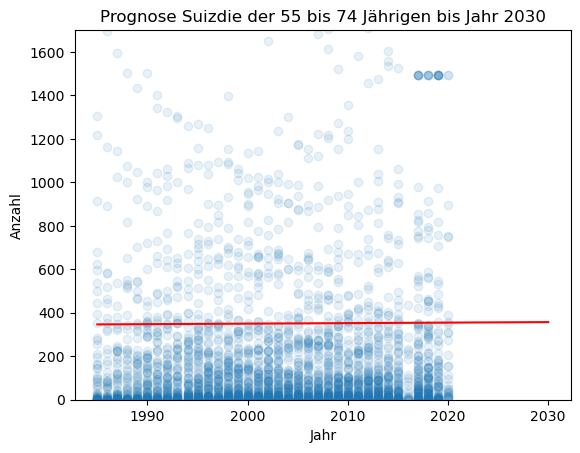

In [1918]:
#Bessere (aber fehlerhaftere) Darstellung
#Diagramm erstellen
plt.scatter(x = x_fiftyfive_train, y = y_fiftyfive_train, alpha = 0.1)
plt.plot(x_fift, y_fift, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 55 bis 74 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1919]:
#Steigung lineare Progression
print(regressor_fiftyfive.coef_)

#Suizide der 55-74 Jährigen für 2030
fiftyfive_2030 = np.array([[2030]])  
fiftyfive_predict = regressor_fiftyfive.predict(fiftyfive_2030)
print(fiftyfive_predict)

[[0.23514816]]
[[357.00508449]]


In [1920]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei 55-74 Jährigen um 0.23514816
#in 2030 wird es wahrscheinlich 357.00508449 Suizide der 55-74 Jährigen 

In [1921]:
#Trainingsfehler der linearen Regression
y_fiftyfive_train_pred = regressor_fiftyfive.predict(np.array(x_fiftyfive_train).reshape(-1,1))
r2_fiftyfive =  r2_score(y_fiftyfive_train, y_fiftyfive_train_pred)
MSE_fiftyfive =  mean_squared_error(y_fiftyfive_train, y_fiftyfive_train_pred)
print(r2_fiftyfive)
print(MSE_fiftyfive)

4.9636264232155725e-06
978248.2829960133


In [1922]:
#Alle Suizdie der über 75 Jährigen
word = '75+ years'
suicide_75 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_75 = dataclean[dataclean['age'] == word]['year'].tolist()
seventyfive = pd.DataFrame({'suicide': suicide_75, 'year': year_75})

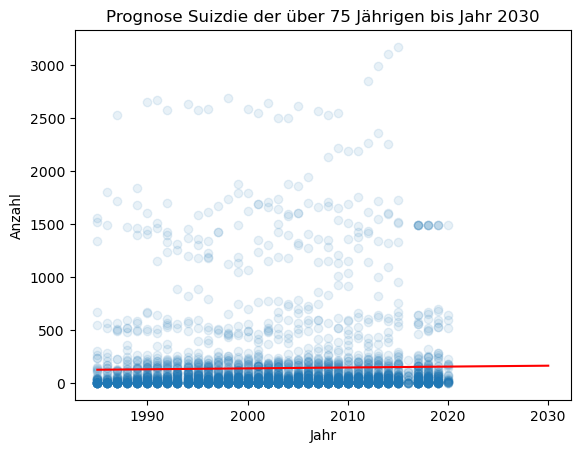

In [1923]:
#Lineare Regression 
regressor_seventyfive = LinearRegression()

#Input Variable 
x_seventyfive = seventyfive['year']

#Output-Variable 
y_seventyfive = seventyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_seventyfive_train,x_seventyfive_test,y_seventyfive_train,y_seventyfive_test=train_test_split(x_seventyfive,y_seventyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_seventyfive.fit(np.array(x_seventyfive_train).reshape(-1, 1), np.array(y_seventyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_s = np.linspace(min(x_seventyfive_train), 2030, 500)

#Arrray für y 
y_s = regressor_seventyfive.coef_ * x_s + regressor_seventyfive.intercept_

#Umformung in 2D-Array 
y_s = y_s.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_seventyfive_train, y = y_seventyfive_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der über 75 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

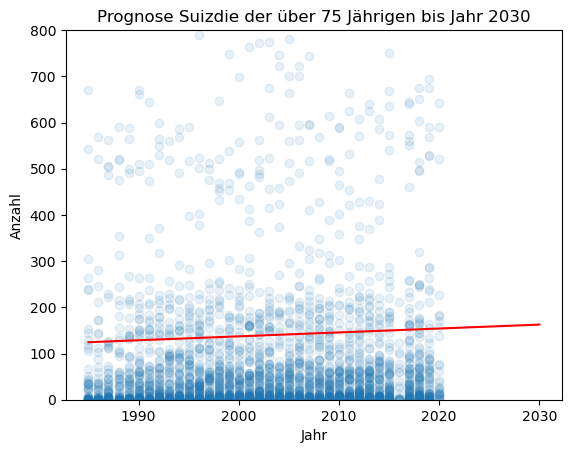

In [1924]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_seventyfive_train, y = y_seventyfive_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der über 75 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,800)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1925]:
#Steigung lineare Progression
print(regressor_seventyfive.coef_)

#Suizide der über 75 Jährigen für 2030
seventyfive_2030 = np.array([[2030]])  
seventyfive_predict = regressor_seventyfive.predict(seventyfive_2030)
print(seventyfive_predict)

[[0.84695093]]
[[162.60129742]]


In [1926]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei über 75 Jährigen um 0.84695093
#in 2030 wird es wahrscheinlich 162.60129742 Suizide der über 75 jährigen geben

In [1927]:
#Trainingsfehler der linearen Regression
y_seventyfive_train_pred = regressor_seventyfive.predict(np.array(x_seventyfive_train).reshape(-1,1))
r2_seventyfive =  r2_score(y_seventyfive_train, y_seventyfive_train_pred)
MSE_seventyfive =  mean_squared_error(y_seventyfive_train, y_seventyfive_train_pred)
print(r2_seventyfive)
print(MSE_seventyfive)

0.0004806975607341002
130979.38272418322


In [1928]:
#Alle Suizide der Generation X
word = 'Generation X'
suicide_X = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_X = dataclean[dataclean['generation'] == word]['year'].tolist()
#Neue Tabelle
genX = pd.DataFrame({'suicide': suicide_X, 'year': year_X})

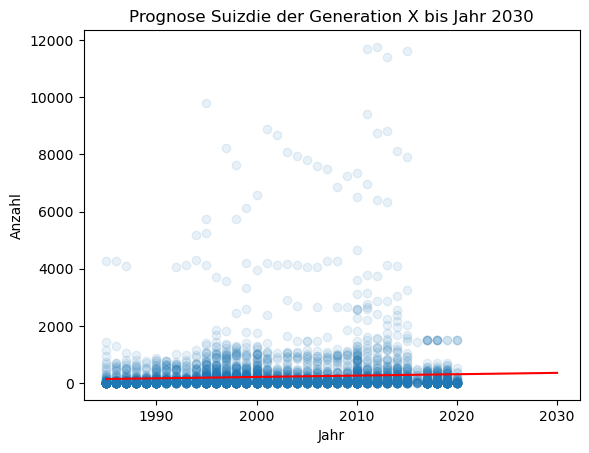

In [1929]:
#Lineare Regression 
regressor_genX = LinearRegression()

#Input Variable 
x_genX = genX['year']

#Output-Variable 
y_genX = genX['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_genX_train,x_genX_test,y_genX_train,y_genX_test=train_test_split(x_genX,y_genX,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_genX.fit(np.array(x_genX_train).reshape(-1, 1), np.array(y_genX_train).reshape(-1, 1))

#Array für x bis 2030
x_X = np.linspace(min(x_genX_train), 2030, 500)

#Arrray für y 
y_X = regressor_genX.coef_ * x_X + regressor_genX.intercept_

#Umformung in 2D-Array 
y_X = y_X.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_genX_train, y = y_genX_train, alpha = 0.1)
plt.plot(x_X, y_X, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation X bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

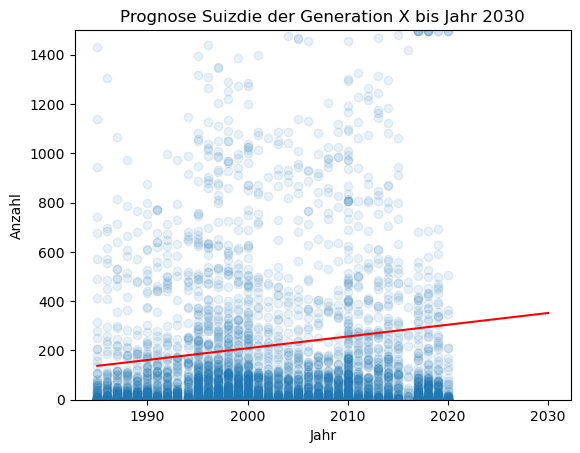

In [1930]:
#Besseres (aber unvollständiges) Darstellung
#Diagramm erstellen
plt.scatter(x = x_genX_train, y = y_genX_train, alpha = 0.1)
plt.plot(x_X, y_X, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation X bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1500)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1931]:
#Steigung lineare Progression
print(regressor_genX.coef_)

#Suizide der Generation X für 2030
genX_2030 = np.array([[2030]])  
genX_predict = regressor_genX.predict(genX_2030)
print(genX_predict)

[[4.77055946]]
[[352.09292106]]


In [1932]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei Generation X um 4.77055946
#in 2030 wird es wahrscheinlich 352.09292106 Suizide der Generation X geben 

In [1933]:
#Trainingsfehler der linearen Regression
y_genX_train_pred = regressor_genX.predict(np.array(x_genX_train).reshape(-1,1))
r2_genX =  r2_score(y_genX_train, y_genX_train_pred)
MSE_genX =  mean_squared_error(y_genX_train, y_genX_train_pred)
print(r2_genX)
print(MSE_genX)

0.004013620444825561
571692.370066948


In [1934]:
#Alle Suizide der Generation Millenial
word = 'Millenials'
suicide_mil = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_mil = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_mil = pd.DataFrame({'suicide': suicide_mil, 'year': year_mil})

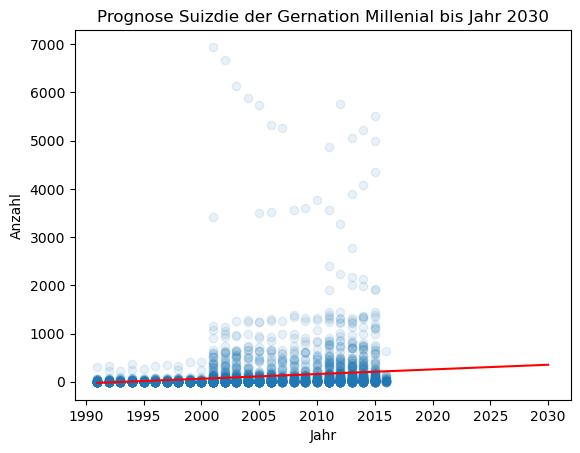

In [1935]:
#Lineare Regression 
regressor_mil = LinearRegression()

#Input Variable 
x_mil = gen_mil['year']

#Output-Variable 
y_mil = gen_mil['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_mil_train,x_mil_test,y_mil_train,y_mil_test=train_test_split(x_mil,y_mil,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_mil.fit(np.array(x_mil_train).reshape(-1, 1), np.array(y_mil_train).reshape(-1, 1))

#Array für x bis 2030
x_mi = np.linspace(min(x_mil_train), 2030, 500)

#Arrray für y 
y_mi = regressor_mil.coef_ * x_mi + regressor_mil.intercept_

#Umformung in 2D-Array 
y_mi = y_mi.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_mil_train, y = y_mil_train, alpha = 0.1)
plt.plot(x_mi, y_mi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Gernation Millenial bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

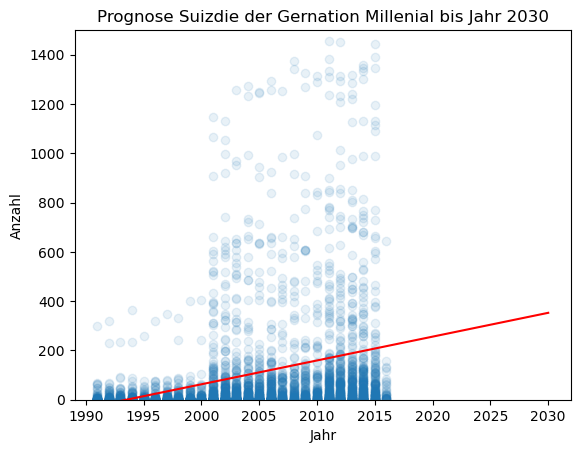

In [1936]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_mil_train, y = y_mil_train, alpha = 0.1)
plt.plot(x_mi, y_mi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Gernation Millenial bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1500)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1937]:
#Steigung lineare Progression
print(regressor_mil.coef_)

#Suizide der Generation Millenial für 2030
mil_2030 = np.array([[2030]])  
mil_predict = regressor_mil.predict(mil_2030)
print(mil_predict)

[[9.66931817]]
[[352.72138633]]


In [1938]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei Generation Millenials um 9.66931817
#in 2030 wird es wahrscheinlich 352.72138633 Suizide der Generation Millenails geben 

In [1939]:
#Trainingsfehler der linearen Regression
y_mil_train_pred = regressor_mil.predict(np.array(x_mil_train).reshape(-1,1))
r2_mil =  r2_score(y_mil_train, y_mil_train_pred)
MSE_mil =  mean_squared_error(y_mil_train, y_mil_train_pred)
print(r2_mil)
print(MSE_mil)

0.023263646564017026
176400.04288839214


In [1940]:
#Alle Suicide der Genration Z
word = 'Generation Z'
suicide_Z = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_Z = dataclean[dataclean['generation'] == word]['year'].tolist()
genZ = pd.DataFrame({'suicide': suicide_Z, 'year': year_Z})

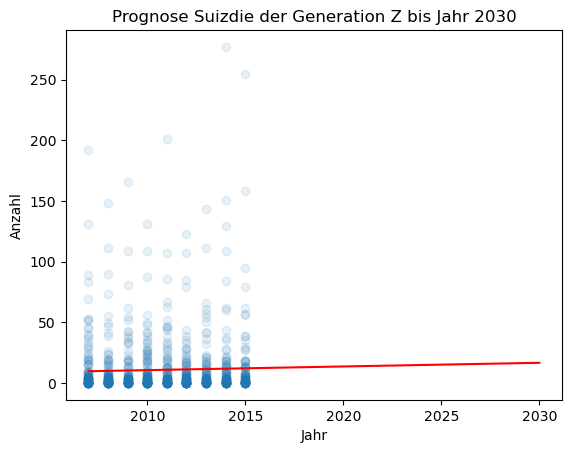

In [1941]:
#Lineare Regression 
regressor_genZ = LinearRegression()

#Input Variable 
x_genZ = genZ['year']

#Output-Variable 
y_genZ = genZ['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_genZ_train,x_genZ_test,y_genZ_train,y_genZ_test=train_test_split(x_genZ,y_genZ,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_genZ.fit(np.array(x_genZ_train).reshape(-1, 1), np.array(y_genZ_train).reshape(-1, 1))

#Array für x bis 2030
x_Z = np.linspace(min(x_genZ_train), 2030, 500)

#Arrray für y 
y_Z = regressor_genZ.coef_ * x_Z + regressor_genZ.intercept_

#Umformung in 2D-Array 
y_Z = y_Z.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_genZ_train, y = y_genZ_train, alpha = 0.1)
plt.plot(x_Z, y_Z, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation Z bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

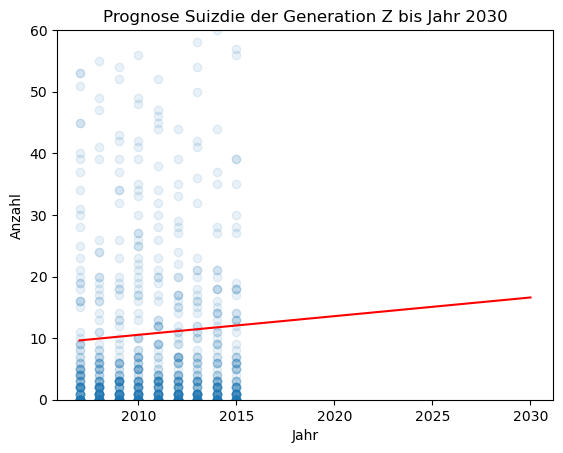

In [1942]:
#Bessere (aber unvollständige Darstellung)
#Diagramm erstellen
plt.scatter(x = x_genZ_train, y = y_genZ_train, alpha = 0.1)
plt.plot(x_Z, y_Z, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation Z bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,60)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1943]:
#Steigung lineare Progression
print(regressor_genZ.coef_)

#Suizide der Generation Z für 2030
genZ_2030 = np.array([[2030]])  
genZ_predict = regressor_genZ.predict(genZ_2030)
print(genZ_predict)

[[0.30299543]]
[[16.59732232]]


In [1944]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei Generation Z um 0.30299543
#in 2030 wird es wahrscheinlich 16.59732232 Suizide der Generation Z geben

In [1945]:
#Trainingsfehler der linearen Regression
y_genZ_train_pred = regressor_genZ.predict(np.array(x_genZ_train).reshape(-1,1))
r2_genZ =  r2_score(y_genZ_train, y_genZ_train_pred)
MSE_genZ =  mean_squared_error(y_genZ_train, y_genZ_train_pred)
print(r2_genZ)
print(MSE_genZ)

0.0009303077673917803
637.4867314643301


In [1946]:
#Alle Suizide der G.I Generation
word = 'G.I. Generation'
suicide_gi = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_gi = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_gi = pd.DataFrame({'suicide': suicide_gi, 'year': year_gi})

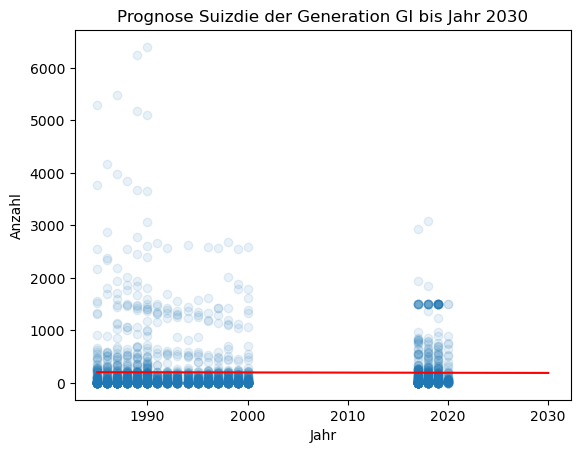

In [1947]:
#Lineare Regression 
regressor_gi = LinearRegression()

#Input Variable 
x_gi = gen_gi['year']

#Output-Variable 
y_gi = gen_gi['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_gi_train,x_gi_test,y_gi_train,y_gi_test=train_test_split(x_gi,y_gi,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_gi.fit(np.array(x_gi_train).reshape(-1, 1), np.array(y_gi_train).reshape(-1, 1))

#Array für x bis 2030
x_g = np.linspace(min(x_gi_train), 2030, 500)

#Arrray für y 
y_g = regressor_gi.coef_ * x_g + regressor_gi.intercept_

#Umformung in 2D-Array 
y_g = y_g.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_gi_train, y = y_gi_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation GI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

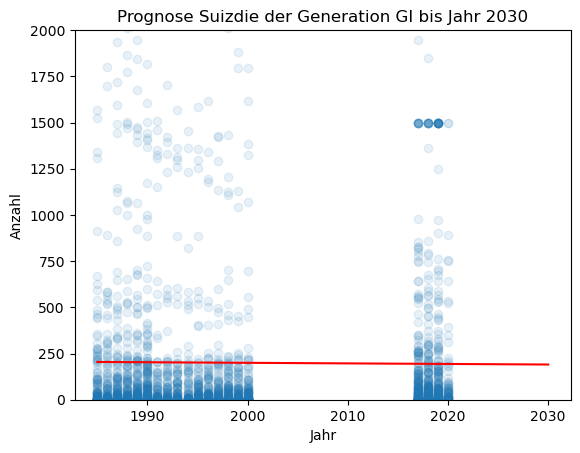

In [1948]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_gi_train, y = y_gi_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation GI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,2000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1949]:
#Steigung lineare Progression
print(regressor_gi.coef_)

#Suizide der Generation GI für 2030
gi_2030 = np.array([[2030]])  
gi_predict = regressor_gi.predict(gi_2030)
print(gi_predict)

[[-0.30759436]]
[[190.47915335]]


In [1950]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei Generation GI um -0.30759436
#in 2030 wird es wahrscheinlich 190.47915335 Suizide der Generation GI geben

In [1951]:
#Trainingsfehler der linearen Regression
y_gi_train_pred = regressor_gi.predict(np.array(x_gi_train).reshape(-1,1))
r2_gi =  r2_score(y_gi_train, y_gi_train_pred)
MSE_gi =  mean_squared_error(y_gi_train, y_gi_train_pred)
print(r2_gi)
print(MSE_gi)

5.234242215901297e-05
264485.716308957


In [1952]:
#Alle Suizider der Generation Boomer
word = 'Boomers'
suicide_bo = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_bo = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_bo = pd.DataFrame({'suicide': suicide_gi, 'year': year_gi})

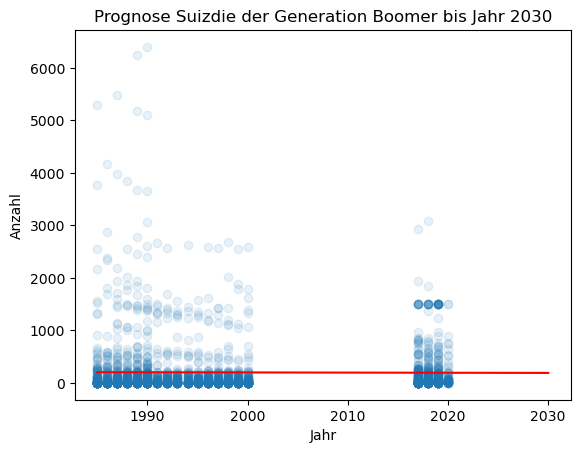

In [1953]:
#Lineare Regression 
regressor_bo = LinearRegression()

#Input Variable 
x_bo = gen_bo['year']

#Output-Variable 
y_bo = gen_bo['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_bo_train,x_bo_test,y_bo_train,y_bo_test=train_test_split(x_bo,y_bo,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_bo.fit(np.array(x_bo_train).reshape(-1, 1), np.array(y_bo_train).reshape(-1, 1))

#Array für x bis 2030
x_b = np.linspace(min(x_bo_train), 2030, 500)

#Arrray für y 
y_b = regressor_bo.coef_ * x_b + regressor_bo.intercept_

#Umformung in 2D-Array 
y_b = y_b.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_bo_train, y = y_bo_train, alpha = 0.1)
plt.plot(x_b, y_b, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation Boomer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

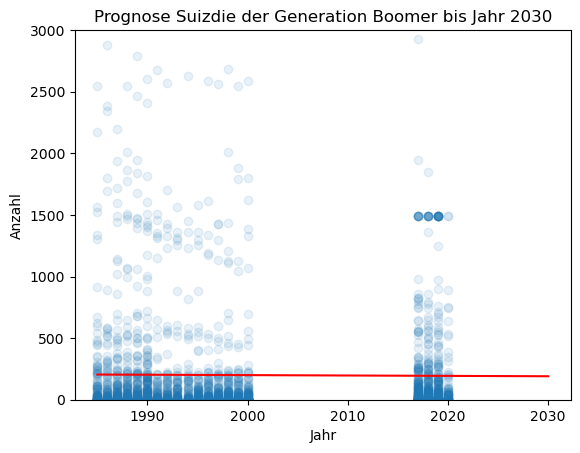

In [1954]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_bo_train, y = y_bo_train, alpha = 0.1)
plt.plot(x_b, y_b, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation Boomer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,3000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1955]:
#Steigung lineare Progression
print(regressor_bo.coef_)

#Suizide der Generation Boomer für 2030
bo_2030 = np.array([[2030]])  
bo_predict = regressor_bo.predict(bo_2030)
print(bo_predict)

[[-0.30759436]]
[[190.47915335]]


In [1956]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei Generation Boomer um -0.30759436
#in 2030 wird es wahrscheinlich 190.47915335 Suizide der Generation Boomer geben 

In [1957]:
#Trainingsfehler der linearen Regression
y_bo_train_pred = regressor_bo.predict(np.array(x_bo_train).reshape(-1,1))
r2_bo =  r2_score(y_bo_train, y_bo_train_pred)
MSE_bo =  mean_squared_error(y_bo_train, y_bo_train_pred)
print(r2_bo)
print(MSE_bo)

5.234242215901297e-05
264485.716308957


In [1958]:
#Alle Suizide der Generation Silent 
word = 'Silent'
suicide_si = dataclean[dataclean['generation'] == word]['suicides_no'].tolist()
year_si = dataclean[dataclean['generation'] == word]['year'].tolist()
gen_si = pd.DataFrame({'suicide': suicide_si, 'year': year_si})
print(gen_si)

      suicide  year
0        16.0  1987
1         6.0  1987
2        14.0  1988
3         4.0  1988
4        15.0  1989
...       ...   ...
6815    309.0  2017
6816    421.0  2017
6817   1495.0  2017
6818     44.0  2017
6819    119.0  2017

[6820 rows x 2 columns]


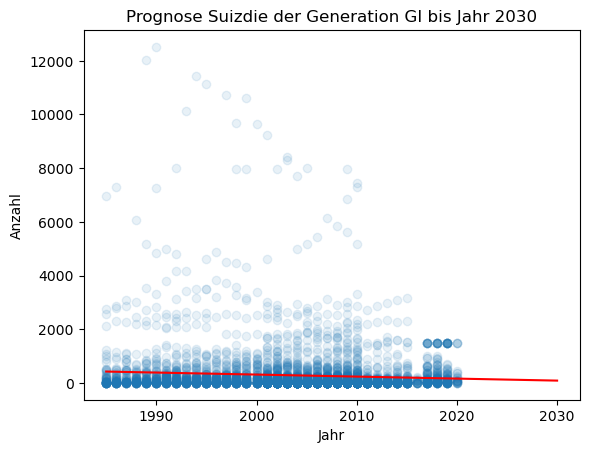

In [1959]:
#Lineare Regression 
regressor_si = LinearRegression()

#Input Variable 
x_si = gen_si['year']

#Output-Variable 
y_si = gen_si['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_si_train,x_si_test,y_si_train,y_si_test=train_test_split(x_si,y_si,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_si.fit(np.array(x_si_train).reshape(-1, 1), np.array(y_si_train).reshape(-1, 1))

#Array für x bis 2030
x_s = np.linspace(min(x_si_train), 2030, 500)

#Arrray für y 
y_s = regressor_si.coef_ * x_s + regressor_si.intercept_

#Umformung in 2D-Array 
y_s = y_s.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_si_train, y = y_si_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation GI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

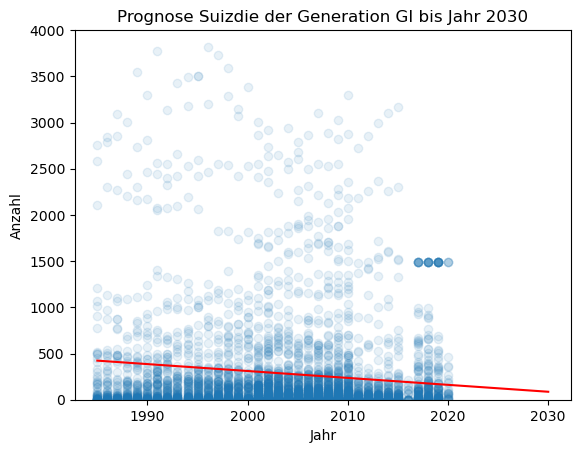

In [1960]:
#Bessere (aber unvollständige) Darstellung 
plt.scatter(x = x_si_train, y = y_si_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Generation GI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,4000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [1961]:
#Steigung lineare Progression
print(regressor_si.coef_)

#Suizide der Generation SI für 2030
si_2030 = np.array([[2030]])  
si_predict = regressor_si.predict(si_2030)
print(si_predict)

[[-7.48444756]]
[[86.21052845]]


In [1962]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei Generation SI um 7.48444756
#in 2030 wird es wahrscheinlich 86.21052845 Generation SI

In [1963]:
#Trainingsfehler der linearen Regression
y_si_train_pred = regressor_si.predict(np.array(x_si_train).reshape(-1,1))
r2_si =  r2_score(y_si_train, y_si_train_pred)
MSE_si =  mean_squared_error(y_si_train, y_si_train_pred)
print(r2_si)
print(MSE_si)

0.005249828578258731
733003.1998530598


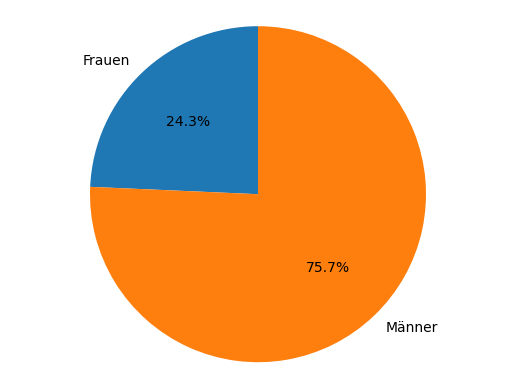

In [1964]:
#Kuchendiagramm Geschlecht
geschlecht = {
    'Frauen': female_predict,
    'Männer':male_predict
}
g = pd.DataFrame(list(geschlecht.items()), columns = ['Variable','Wert'])
plt.pie(g['Wert'], labels = g['Variable'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

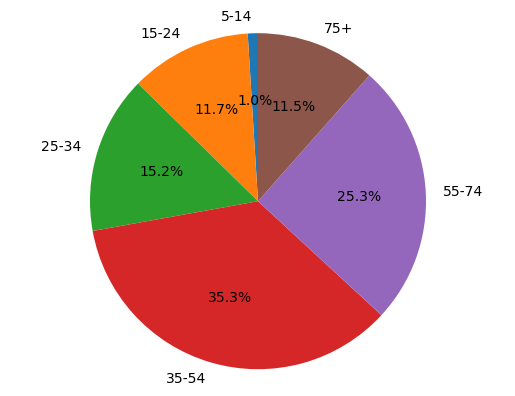

In [1965]:
#Kuchendiagramm Altersgruppen
alter = {
    '5-14': five_predict,
    '15-24': fiveteen_predict,
    '25-34':twentyfive_predict,
    '35-54': thirtyfive_predict,
    '55-74': fiftyfive_predict,
    '75+': seventyfive_predict
}
a = pd.DataFrame(list(alter.items()), columns = ['Variable','Wert'])
plt.pie(a['Wert'], labels = a['Variable'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

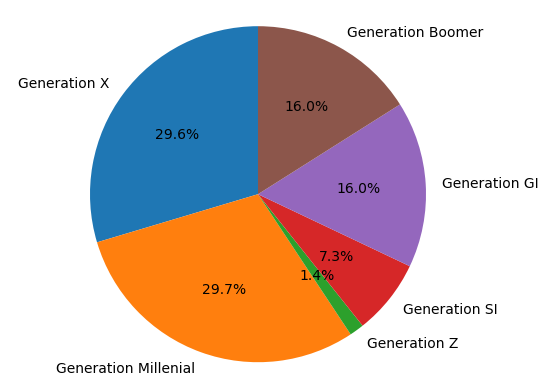

In [1966]:
#Kuchendiagramm Altersgruppen
alter = {
    'Generation X': genX_predict,
    'Generation Millenial': mil_predict,
    'Generation Z':genZ_predict,
    'Generation SI': si_predict,
    'Generation GI': gi_predict,
    'Generation Boomer': bo_predict
}
a = pd.DataFrame(list(alter.items()), columns = ['Variable','Wert'])
plt.pie(a['Wert'], labels = a['Variable'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()